<a href="https://colab.research.google.com/github/parashar-manas/FacialExpressionRecognition/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Clone the Facial Expression Dataset repository from GitHub
!git clone https://github.com/parth1620/Facial-Expression-Dataset.git

# Install or upgrade the Albumentations library using pip
# Albumentations is a popular library for image augmentation techniques
!pip install -U git+https://github.com/albumentations-team/albumentations

# Install the 'timm' library, which provides pre-trained models and model building utilities
!pip install timm

# Upgrade or install the OpenCV library with the contrib package
# OpenCV is a powerful computer vision library, and the contrib package includes additional features
!pip install --upgrade opencv-contrib-python

Cloning into 'Facial-Expression-Dataset'...
remote: Enumerating objects: 34052, done.
remote: Total 34052 (delta 0), reused 0 (delta 0), pack-reused 34052
Receiving objects: 100% (34052/34052), 52.31 MiB | 45.75 MiB/s, done.
Resolving deltas: 100% (4/4), done.
Updating files: 100% (35887/35887), done.
  Cloning https://github.com/albumentations-team/albumentations to /tmp/pip-req-build-7tuh_b9m
  Running command git clone --filter=blob:none --quiet https://github.com/albumentations-team/albumentations /tmp/pip-req-build-7tuh_b9m
  Resolved https://github.com/albumentations-team/albumentations to commit e3b47b3a127f92541cfeb16abbb44a6f8bf79cc8
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 16.9 MB/s eta 0:00:00


In [2]:
# Import the NumPy library for numerical operations and array manipulation
import numpy as np

# Import the Matplotlib library for data visualization, particularly for creating plots and charts
import matplotlib.pyplot as plt

# Import the PyTorch library, a popular deep learning framework for building and training neural networks
import torch

# Import the PIL (Python Imaging Library) module for image processing tasks
from PIL import Image, ImageOps

# Import the torchvision.transforms module, which provides a collection of image transformation functions
import torchvision.transforms as T

# Import the ImageFolder dataset class from torchvision.datasets module
from torchvision.datasets import ImageFolder

# Import the transforms module from torchvision, which provides image transformation functions
from torchvision import transforms as T

# Import the DataLoader class from the torch.utils.data module
from torch.utils.data import DataLoader

# Import the 'timm' library, which provides pre-trained deep learning models
import timm

# Import the 'nn' module from PyTorch, which contains neural network building blocks
from torch import nn

# Import the 'tqdm' library for displaying progress bars during iterations
from tqdm import tqdm

In [3]:
# Define the file path for the training images
TRAIN_IMG_FOLDER_PATH = '/content/Facial-Expression-Dataset/train/'

# Define the file path for the validation images
VALID_IMG_FOLDER_PATH = '/content/Facial-Expression-Dataset/validation/'

# Set the learning rate for training the model
LP = 0.001

# Set the batch size for training data
BATCH_SIZE = 32

# Set the number of training epochs
EPOCHS = 20

# Specify the device for model training (e.g., 'cuda' for GPU or 'cpu' for CPU)
DEVICE = 'cuda'

# Specify the name of the model to be used (e.g., 'efficientnet_b0')
MODEL_NAME = 'efficientnet_b0'

In [4]:
# Define a sequence of data augmentation transformations for training data
train_augs = T.Compose([
    # Randomly flip images horizontally with a 75% probability
    T.RandomHorizontalFlip(p=0.75),

    # Randomly rotate images within the range of -50 to +50 degrees
    T.RandomRotation(degrees=(-50, +50)),

    # Convert the augmented image to a PyTorch tensor
    T.ToTensor()
])

# Define a sequence of transformations for validation data
valid_augs = T.Compose([
    # Convert the validation image to a PyTorch tensor
    T.ToTensor()
])

In [5]:
# Create a training dataset using the ImageFolder class
# The dataset is loaded from the TRAIN_IMG_FOLDER_PATH directory
# The specified 'train_augs' transformations are applied to the images
trainset = ImageFolder(TRAIN_IMG_FOLDER_PATH, transform=train_augs)

# Create a validation dataset using the ImageFolder class
# The dataset is loaded from the VALID_IMG_FOLDER_PATH directory
# The specified 'valid_augs' transformations are applied to the images
validset = ImageFolder(VALID_IMG_FOLDER_PATH, transform=valid_augs)

In [6]:
# Print the total number of examples in the training dataset
print(f"Total Number of examples in Trainset: {len(trainset)}")

# Print the total number of examples in the validation dataset
print(f"Total Number of examples in Validset: {len(validset)}")

Total Number of examples in Trainset: 28821
Total Number of examples in Validset: 7066


Text(0.5, 1.0, '0')

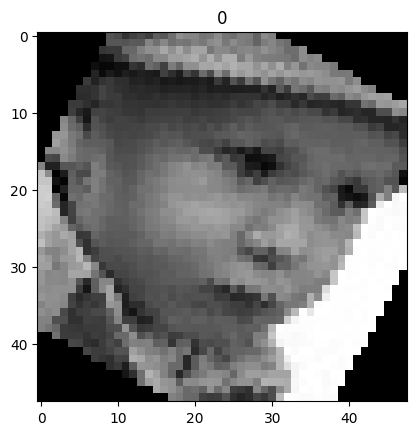

In [7]:
# Retrieve an image and its corresponding label from the training dataset (in this case, the 20th example)
image, label = trainset[20]

# Display the image using Matplotlib after permuting its dimensions to (height, width, channels)
plt.imshow(image.permute(1, 2, 0))

# Set the title of the plot to the label of the image
plt.title(label)

In [8]:
# Print the class-to-index mapping in the training dataset
print(trainset.class_to_idx)

{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


In [9]:
# Create a data loader for the training dataset
# 'trainset' is the dataset to load from
# 'BATCH_SIZE' specifies the batch size for loading data
# 'shuffle=True' shuffles the data to ensure random order during training
trainloader = DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True)

# Create a data loader for the validation dataset
# 'validset' is the dataset to load from
# 'BATCH_SIZE' specifies the batch size for loading data
# 'shuffle=True' shuffles the data to ensure random order during validation
validloader = DataLoader(validset, batch_size=BATCH_SIZE, shuffle=True)

In [10]:
# Print the total number of batches in the training data loader
print(f"Total Number of batches in Trainloader: {len(trainloader)}")

# Print the total number of batches in the validation data loader
print(f"Total Number of batches in Validloader: {len(validloader)}")

Total Number of batches in Trainloader: 901
Total Number of batches in Validloader: 221


In [11]:
# Iterate over the training data loader to retrieve one batch of images and labels
for images, labels in trainloader:
    break

# Print the shape of one batch of images
print(f"One image batch shape: {images.shape}")

# Print the shape of one batch of labels
print(f"One label batch shape: {labels.shape}")

One image batch shape: torch.Size([32, 3, 48, 48])
One label batch shape: torch.Size([32])


In [12]:
# Define a custom neural network model class called 'FaceModel'
class FaceModel(nn.Module):

    # Constructor method to initialize the model
    def __init__(self):
        super(FaceModel, self).__init__()

        # Create an instance of the EfficientNet-B0 model with pretrained weights
        self.eff_net = timm.create_model('efficientnet_b0', pretrained=True, num_classes=7)

    # Forward method that defines the model's forward pass
    def forward(self, images, labels=None):

        # Pass the input images through the EfficientNet-B0 model
        logits = self.eff_net(images)

        if labels is not None:
            # If labels are provided, compute the Cross-Entropy loss
            loss = nn.CrossEntropyLoss()(logits, labels)
            return logits, loss

        # If labels are not provided, return the logits
        return logits

In [13]:
# Create an instance of the 'FaceModel' class, which is a custom neural network model
model = FaceModel()

# Move the model to the specified device ('cuda' for GPU, 'cpu' for CPU)
model.to(DEVICE)

FaceModel(
  (eff_net): EfficientNet(
    (conv_stem): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn1): BatchNormAct2d(
      32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
      (drop): Identity()
      (act): SiLU(inplace=True)
    )
    (blocks): Sequential(
      (0): Sequential(
        (0): DepthwiseSeparableConv(
          (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (bn1): BatchNormAct2d(
            32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
            (drop): Identity()
            (act): SiLU(inplace=True)
          )
          (se): SqueezeExcite(
            (conv_reduce): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (act1): SiLU(inplace=True)
            (conv_expand): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (gate): Sigmoid()
          )
          (conv_pw): Conv2d(32, 16, kernel_size=(1, 

In [14]:
# Define a function to calculate the multi-class classification accuracy
def multiclass_accuracy(y_pred, y_true):
    # Get the predicted class with the highest probability for each example
    top_p, top_class = y_pred.topk(1, dim=1)

    # Compare the predicted class with the true class labels
    equals = top_class == y_true.view(*top_class.shape)

    # Calculate the mean accuracy over all examples and return it
    return torch.mean(equals.type(torch.FloatTensor))

In [15]:
# Define a function for training a deep learning model
def train_fn(model, dataloader, optimizer, current_epo):
    # Set the model to training mode
    model.train()

    # Initialize variables to keep track of total loss and total accuracy
    total_loss = 0.0
    total_acc = 0.0

    # Create a tqdm progress bar to display training progress
    tk = tqdm(dataloader, desc="EPOCH [TRAIN] " + str(current_epo + 1) + "/" + str(EPOCHS))

    # Iterate over batches in the dataloader
    for t, data in enumerate(tk):
        images, labels = data
        images, labels = images.to(DEVICE), labels.to(DEVICE)

        # Zero the gradients to prevent accumulation
        optimizer.zero_grad()

        # Forward pass through the model and compute the loss
        logits, loss = model(images, labels)

        # Backpropagate the gradients and update the model's parameters
        loss.backward()
        optimizer.step()

        # Update the total loss and accuracy
        total_loss += loss.item()
        total_acc += multiclass_accuracy(logits, labels)

        # Update the tqdm progress bar with loss and accuracy information
        tk.set_postfix({'Loss': '%6f' % float(total_loss / (t + 1)), 'Accuracy': '%6f' % float(total_acc / (t + 1))})

    # Calculate and return the average loss and accuracy for the epoch
    return total_loss / len(dataloader), total_acc / len(dataloader)

In [16]:
# Define a function for evaluating a deep learning model
def eval_fn(model, dataloader, current_epo):
    # Set the model to evaluation mode
    model.eval()

    # Initialize variables to keep track of total loss and total accuracy
    total_loss = 0.0
    total_acc = 0.0

    # Create a tqdm progress bar to display evaluation progress
    tk = tqdm(dataloader, desc="EPOCH [VALID] " + str(current_epo + 1) + "/" + str(EPOCHS))

    # Iterate over batches in the dataloader
    for t, data in enumerate(tk):
        images, labels = data
        images, labels = images.to(DEVICE), labels.to(DEVICE)

        # Forward pass through the model and compute the loss
        logits, loss = model(images, labels)

        # Update the total loss and accuracy
        total_loss += loss.item()
        total_acc += multiclass_accuracy(logits, labels)

        # Update the tqdm progress bar with loss and accuracy information
        tk.set_postfix({'Loss': '%6f' % float(total_loss / (t + 1)), 'Accuracy': '%6f' % float(total_acc / (t + 1))})

    # Calculate and return the average loss and accuracy for the epoch
    return total_loss / len(dataloader), total_acc / len(dataloader)

In [17]:
# Initialize the Adam optimizer for the model's parameters
# 'model.parameters()' provides the parameters to be optimized
# 'lr=LP' sets the learning rate to the value stored in the 'LP' variable
optimizer = torch.optim.Adam(model.parameters(), lr=LP)

In [18]:
# Initialize a variable to store the best validation loss as positive infinity
best_valid_loss = np.Inf

# Iterate over the specified number of training epochs
for i in range(EPOCHS):
    # Train the model for one epoch and calculate training loss and accuracy
    train_loss, train_acc = train_fn(model, trainloader, optimizer, i)

    # Evaluate the model on the validation dataset for one epoch and calculate validation loss and accuracy
    valid_loss, valid_acc = eval_fn(model, validloader, i)

    # Check if the current validation loss is better (lower) than the best validation loss so far
    if valid_loss < best_valid_loss:
        # Save the model's state dictionary to 'best-weights.pt'
        torch.save(model.state_dict(), 'best-weights.pt')
        print("SAVED-BEST-WEIGHTS")
        # Update the best validation loss with the current validation loss
        best_valid_loss = valid_loss


EPOCH [VALID] 1/20: 100%|██████████| 221/221 [00:06<00:00, 34.56it/s, Loss=1.409004, Accuracy=0.462496]


SAVED-BEST-WEIGHTS


EPOCH [VALID] 2/20: 100%|██████████| 221/221 [00:06<00:00, 35.05it/s, Loss=1.264470, Accuracy=0.513923]


SAVED-BEST-WEIGHTS


EPOCH [VALID] 3/20: 100%|██████████| 221/221 [00:06<00:00, 35.38it/s, Loss=1.175353, Accuracy=0.544324]


SAVED-BEST-WEIGHTS


EPOCH [VALID] 4/20: 100%|██████████| 221/221 [00:06<00:00, 35.80it/s, Loss=1.141472, Accuracy=0.567047]


SAVED-BEST-WEIGHTS


EPOCH [VALID] 5/20: 100%|██████████| 221/221 [00:05<00:00, 39.04it/s, Loss=1.108644, Accuracy=0.579523]


SAVED-BEST-WEIGHTS


EPOCH [VALID] 6/20: 100%|██████████| 221/221 [00:05<00:00, 39.96it/s, Loss=1.088244, Accuracy=0.589497]


SAVED-BEST-WEIGHTS


EPOCH [VALID] 9/20: 100%|██████████| 221/221 [00:06<00:00, 35.26it/s, Loss=1.041295, Accuracy=0.601342]


SAVED-BEST-WEIGHTS


EPOCH [VALID] 12/20: 100%|██████████| 221/221 [00:05<00:00, 37.88it/s, Loss=1.015652, Accuracy=0.616048]


SAVED-BEST-WEIGHTS


EPOCH [VALID] 17/20: 100%|██████████| 221/221 [00:06<00:00, 35.02it/s, Loss=1.014002, Accuracy=0.622063]


SAVED-BEST-WEIGHTS


EPOCH [VALID] 20/20: 100%|██████████| 221/221 [00:05<00:00, 38.57it/s, Loss=1.004343, Accuracy=0.627317]


SAVED-BEST-WEIGHTS


In [20]:
# Define a function for visualizing image classification results
def view_classify(img, ps):
    # Define a list of class names corresponding to the output classes
    classes = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

    # Convert the predicted probabilities to a NumPy array and remove the extra dimensions
    ps = ps.data.cpu().numpy().squeeze()

    # Convert the image tensor to a NumPy array and transpose it to the correct format
    img = img.numpy().transpose(1, 2, 0)

    # Create a figure with two subplots for displaying the image and class probabilities
    fig, (ax1, ax2) = plt.subplots(figsize=(5, 9), ncols=2)

    # Display the image on the left subplot and remove axis labels
    ax1.imshow(img)
    ax1.axis('off')

    # Create a horizontal bar chart on the right subplot to visualize class probabilities
    ax2.barh(classes, ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(classes)
    ax2.set_yticklabels(classes)
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    # Ensure a tight layout for better visualization
    plt.tight_layout()

    # Return None (this function is used for visualization purposes)
    return None

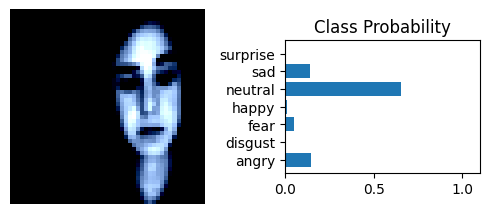

In [22]:
# Define the file path for the image
image_path = '/content/download (2).jpeg'

# Open and load the image using PIL
image = Image.open(image_path)

# Convert the image to grayscale using ImageOps
bw_image = ImageOps.grayscale(image)

# Define a series of image transformation operations using torchvision transforms
resize_transform = T.Compose([
    # Resize the image to a specified size (48x48 pixels)
    T.Resize((48, 48)),

    # Convert the image to grayscale with three channels
    T.Grayscale(num_output_channels=3),

    # Convert the image to a PyTorch tensor
    T.ToTensor(),

    # Normalize the image using specified mean and standard deviation values
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Apply the defined transformations to the input image and unsqueeze it to add a batch dimension
input_image = resize_transform(image).unsqueeze(0)

# Move the input image to the specified device (e.g., 'cuda' for GPU)
input_image = input_image.to(DEVICE)

# Disable gradient tracking and set the model to evaluation mode
with torch.no_grad():
    model.eval()

    # Perform forward pass on the input image to obtain model predictions
    output = model(input_image)

# Move the model predictions and input image back to the CPU for visualization
output = output.cpu()
input_image = input_image.cpu()

# Use the 'view_classify' function to visualize the classification results
view_classify(input_image[0], torch.softmax(output, dim=1))